In [105]:
import numpy as np
import random

In [106]:
class Person(object):
    def __init__(self):
        self.status = "Susceptible"
        self.days_sick = 0
        self.sickness_rate = 10
        self.interaction = []
        
    def set_sickness_rate(self, new_rate):
        self.sickness_rate = new_rate
        
    def infect(self, number_of_days_sick):
        self.status = "Infected"
        self.days_sick = number_of_days_sick
        
    def recover(self):
        self.status = "Recovered"
        self.days_sick = 0
        
    def update(self):
        if (self.status == "Susceptible"):
            self.roll_for_infection()
            
        elif (self.status == "Infected"):   
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()
                
    def update_days_sick(self):
        if (self.status == "Infected"): 
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()
            
    def roll_for_infection(self):
        is_sick = (random.randint(0,101) < self.sickness_rate) 
        if (is_sick):
            self.infect(4)

In [107]:
n = 100
population = []

for i in range(1, n + 1):
    generic_dude = Person()
    population.append(generic_dude)
    
for j in range(1, n + 1):
    persons_interacted = []
    for x in range(0, 10): 
        some_person = random.randint(1, n)
        persons_interacted.append(some_person)
        if (some_person == j):
            some_person = random.randint(1, 100)
    #print("Person " + str(j) + " interacted with Persons: " + str(persons_interacted))

In [108]:
#interactions = []
#index = -1
#for p in population:
#    p_interactions = []
#    for i in range(0,10):
#        r = random.randint(0,100)
#        p_interactions.append(r)
#    interactions.append(p_interactions)

#for i in interactions:
#    index = index + 1
#    print ("Person:", index, " interacted with:", i)

In [109]:
# We're selecting 10 indexes of people we're going to infect
currently_infected = random.sample(range(100), 10)

for i in currently_infected:
    population[i].infect(5)


print ("Day 1, number of people sick:" + str(len(currently_infected)))
print (currently_infected)

interactions = []
person_index = -1
for p in population:
    person_index = person_index + 1

    # if person_index is in the currently_sick list, everyone they interact w/ can get sick
    
    p_interactions = []
    for i in range(0,10):        
        r = random.randint(0,99)
        p_interactions.append(r)

        #If person_index is already sick, everyone they contact, might also get sick
        
        if (person_index in currently_infected):
            population[r].update()
            if (population[r].status == "Infected" and r not in currently_infected):
                currently_infected.append(r)
        #If anyone has an infected person in their interactions list, *they* might get infected
        if (r in currently_infected):
            population[person_index].update()
            if (population[person_index].status == "Infected" and person_index not in currently_infected):
                currently_infected.append(person_index)
    interactions.append(p_interactions)
        
        
# person_index = -1
# for i in interactions:
#     person_index = person_index + 1
#     print ("Person:", person_index, " interacted with:", i)

print ("End of Day 1, number of people sick:", len(currently_infected))
print (currently_infected)

Day 1, number of people sick:10
[56, 59, 98, 75, 62, 20, 83, 53, 5, 52]
End of Day 1, number of people sick: 50
[56, 59, 98, 75, 62, 20, 83, 53, 5, 52, 4, 6, 91, 7, 14, 16, 68, 28, 23, 32, 50, 51, 84, 66, 79, 21, 54, 42, 64, 99, 69, 55, 70, 72, 15, 74, 46, 76, 78, 81, 47, 58, 94, 80, 87, 71, 35, 93, 2, 40]


In [110]:
class Population:
    def __init__(self, number=100, interaction=10): #vaccine=?
        self.People = []
        self.number = number
        self.interaction = interaction
        
        if (number < 100):
            self.number = 100
            
        if (interaction < 10):
            self.interact = 10
            
        #build our population
        patient_Zero = Person()
        patient_Zero.infect(5)
        
        self.People.append(patient_Zero)
        
        for i in range(0, number):
            p = Person()
            
            #pre vaccinate people here
            self.People.append(p)
            
    def number_of_sick(self):
        sick_Count = 0
        for j in self.People:
            if (j.status == "Infected"):
                sick_Count = sick_Count + 1
                
        return sick_Count
        
    def number_of_recovered(self):
        recovered_Count = 0
        for j in self.People:
            if (j.status == "Recovered"):
                recovered_Count = recovered_Count + 1
                
        return recovered_Count
    
    def number_of_susceptible(self):
        susceptible_Count = 0
        for j in self.People:
            if (j.status == "Susceptible"):
                susceptible_Count = susceptible_Count + 1
                
        return susceptible_Count
    
    # Here's the brains of the population class (and our code)
    # the update will be ran everyday (meaning, every iteration of our while loop)
    # build interaction tables (who interacted with who)
    # if person interacts with sick, then they must roll die
    # if I interacted with 10 people and I'm sick, then each of them must roll 

    def update(self):
        # people who might get sick
        might_Get_Sick = []
        
        for person in self.People:
            
            #clear out your interactions per day
            person.interaction = []
            
            #These are the n number of people that you interact with
            
            for i in range(0, self.interaction):
                r = random.randint(0,self.number)
                person.interaction.append(r)
                
            #if "person" is infected, every single person they interacted with might get sick
            if (person.status == "Infected"):
                person.update_days_sick()
                for m in person.interaction:
                    if (self.People[m].status ==  "Susceptible"):  #only susceptible people can get sicky susceptible people can get sickus == "Susceptible"): #only susceptible people can get sick
                        might_Get_Sick.append(self.People[m]) #this list will keep growing with every person that needs to roll their die
                
            #if "person" is susceptible and they interact w/ someone who is "infected" 
            #person gets added to the "might get sick"
            if (person.status == "Susceptible"):
                for m in person.interaction:
                    if (self.People[m].status == "Infected"):
                        might_Get_Sick.append(person)
                        
                        
        #Now! We're going to roll through our "Might Get Sick" and they each roll a die
        #this is only a list of susceptible people
        for m in might_Get_Sick:
            m.roll_for_infection()

In [111]:
myCommunity = Population(1000, 10)
day = 0
my_plot = [] 
number_sick = myCommunity.number_of_sick()

while (number_sick > 0):
    number_sick = myCommunity.number_of_sick()
    number_recovered = myCommunity.number_of_recovered()
    my_plot.append([day, number_sick, number_recovered])
    print ("day:", day, "Number of sick:", number_sick)
    
    day = day + 1
    myCommunity.update()
    
#print ("day:", day, "Number of sick:", myCommunity.number_of_sick())
print ("Number recovered:", myCommunity.number_of_recovered())
print ("Number susceptible:", myCommunity.number_of_susceptible())

print (my_plot)

day: 0 Number of sick: 1
day: 1 Number of sick: 1
day: 2 Number of sick: 4
day: 3 Number of sick: 12
day: 4 Number of sick: 40
day: 5 Number of sick: 136
day: 6 Number of sick: 349
day: 7 Number of sick: 664
day: 8 Number of sick: 874
day: 9 Number of sick: 843
day: 10 Number of sick: 641
day: 11 Number of sick: 322
day: 12 Number of sick: 85
day: 13 Number of sick: 19
day: 14 Number of sick: 5
day: 15 Number of sick: 1
day: 16 Number of sick: 0
Number recovered: 999
Number susceptible: 2
[[0, 1, 0], [1, 1, 0], [2, 4, 0], [3, 12, 0], [4, 40, 0], [5, 136, 1], [6, 349, 4], [7, 664, 12], [8, 874, 40], [9, 843, 137], [10, 641, 353], [11, 322, 676], [12, 85, 914], [13, 19, 980], [14, 5, 994], [15, 1, 998], [16, 0, 999]]


In [112]:
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
df = pd.DataFrame(my_plot, columns=['day','number_sick', 'number_recovered'])

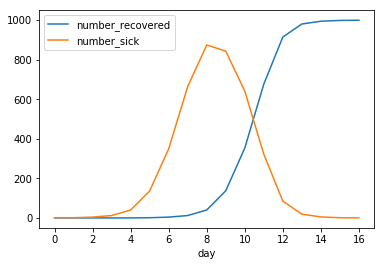

In [114]:
fig = plt.figure()
ax1 = plt.gca()
fig1 = df.plot(kind='line', x='day', y='number_recovered', ax=ax1).get_figure()
fig2 = df.plot(kind='line', x='day', y='number_sick', ax=ax1).get_figure()
plt.savefig('test.png')
plt.show()